In [223]:
# Imports
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.integrate as integrate
import scipy.signal
import scipy.stats
from scipy.special import erfcinv

%config InlineBackend.figure_format = 'svg'

In [269]:
# Normal with log-normal variance distribution
class NLNV(scipy.stats.rv_continuous):
    def _pdf_prevec(self, v, lnvmu, lnvsigma):
        # print("pdf_prevec")
        return scipy.integrate.quad(lambda x : scipy.stats.lognorm.pdf(x, lnvsigma, np.exp(lnvmu)) * scipy.stats.norm.pdf(v, 0, np.sqrt(x)), 0, np.inf)[0]
    def _pdf(self, v, lnvmu, lnvsigma):
        print("pdf")
        return np.vectorize(self._pdf_prevec)(v, lnvmu, lnvsigma)
    def _cdf_prevec(self, v, lnvmu, lnvsigma):
        print("cdf_prevec")
        return scipy.integrate.quad(lambda x : scipy.stats.lognorm.pdf(x, lnvsigma, np.exp(lnvmu)) * scipy.stats.norm.cdf(v, 0, np.sqrt(x)), 0, np.inf)[0]
    def _cdf(self, v, lnvmu, lnvsigma):
        print("cdf")
        return np.vectorize(self._cdf_prevec)(v, lnvmu, lnvsigma)
    def _ppf_prevec(self, v, lnvmu, lnvsigma):
        print("ppf_prevec")
        return scipy.integrate.quad(lambda x : scipy.stats.lognorm.pdf(x, lnvsigma, np.exp(lnvmu)) * scipy.stats.norm.ppf(v, 0, np.sqrt(x)), 0, np.inf)[0]
    def _ppf(self, v, lnvmu, lnvsigma):
        print("ppf")
        return np.vectorize(self._ppf_prevec)(v, lnvmu, lnvsigma)
    def _argcheck(self, lnvmu, lnvsigma):
        return lnvsigma > 0
    def _fitstart(self, data):
        print("fitstart")
        return np.var(data), np.var(data)/100, np.mean(data), 1.0

In [271]:
# Test fit function
samps = np.random.uniform(10, 15, 40)
nlnv = NLNV()
results = nlnv.fit(samps)
print(results)
# results = scipy.stats.probplot(samps, sparams=(0, 2, 12.5), dist=NLNV(), plot=plt)
# print(results)
# plt.show()
# results = scipy.stats.probplot(samps, dist='norm', plot=plt)
# print(results)
# plt.show()

fitstart
pdf
pdf


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf
pdf


ppf
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec
ppf_prevec


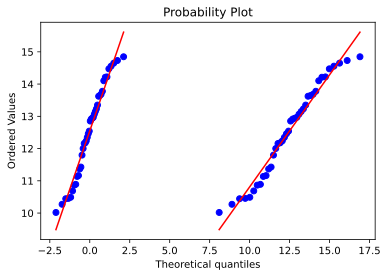

In [274]:
results = scipy.stats.probplot(samps, sparams=(0, 2, 12.5), dist=NLNV(), plot=plt, fit=False)
results = scipy.stats.probplot(samps, dist='norm', plot=plt)